# This Notebook tests whether your cedalion installation is working

Everything that is specific to the installation of Cedalion can be found on our documentation page: https://doc.ibs.tu-berlin.de/cedalion/doc/dev

It is assumed that you already followed the steps below: 
- Have the conda package manager installed, either by installing [Anaconda or Miniconda](https://docs.anaconda.com/distro-or-miniconda/). 
- Clone the Cedalion repository from github to your local disk. The main branch is the release branch.
- In your IDE, switch to the Cedalion folder as your local working folder or “add to path”.
- In its Python terminal create a conda environment with the necessary dependencies by running:  
```
$ conda env create -n cedalion -f environment_dev.yml
```
- This installs all relevant dependencies and creates an environment in which you can run the toolbox. It also includes Jupyter Notebook to run the example notebooks.
- Afterwards activate the environment and add an editable install of Cedalion to it:

```
$ conda activate cedalion
$ pip install -e .
```

 
If creating the environment is slow:
- To create the environment conda needs to find a set of packages that fulfills all requirements. If conda needs too much time to find a solution, there are two ways to speed it up.
- Install [libmamba-solver](https://conda.github.io/conda-libmamba-solver/user-guide/) and configure conda to use it. (recommended )
- If you have a recent conda version (23.10 or later), libmamba is already preconfigured. Otherwise update:
```
$ conda update -n base conda
```

## Import Cedalion Dependencies
If you get an error here, revisit the setup above.

In [1]:
import cedalion
import cedalion.datasets
import cedalion.plots

## Download datasets
These will be cached and are used by amongst others by the example notebooks.

- [Image Reconstruction](https://github.com/ibs-lab/cedalion/blob/main/examples/image_reconstruction.ipynb)
- [Photogrammetric Coregistration](https://github.com/ibs-lab/cedalion/blob/main/examples/photogrammetric_optode_coregistration.ipynb)

Depending on your operating system the user cache directory is one of these:
- Mac: `~/Library/Caches/cedalion`
- Unix: `~/.cache/cedalion`
- Windows: `C:\Users\<user>\AppData\Local\cedalion\cedalion\Cache`

It is safe to delete the downloaded files, if they are not needed anymore. During a new run of the example notebooks they are downloaded again.


<font color='red'>Developer note:  pyH5 is not working correctly on Python 3.12 with the snirf tool.  I had to rollback to Python3.11.  </font>

In [2]:
# loads finger tapping data with sparse probe 
rec = cedalion.datasets.get_fingertapping()
display(rec)

<Recording |  timeseries: ['amp'],  masks: [],  stim: ['1.0', '15.0', '2.0', '3.0'],  aux_ts: [],  aux_obj: []>

In [3]:
# loads finger tapping data with high density probe
rec = cedalion.datasets.get_fingertappingDOT()
display(rec)

<Recording |  timeseries: ['amp'],  masks: [],  stim: ['1', '2', '3', '4', '5'],  aux_ts: ['ACCEL_X_1', 'ACCEL_Y_1', 'ACCEL_Z_1', 'GYRO_X_1', 'GYRO_Y_1', 'GYRO_Z_1', 'ExGa1', 'ExGa2', 'ExGa3', 'ExGa4', 'ECG', 'Respiration', 'PPG', 'SpO2', 'Heartrate', 'GSR', 'Temperature'],  aux_obj: []>

<font color='red'>Developer note: The zip sha256 for the Colin segmentation didn't match the zip file size and I had to change the sha size in the datasets.py code to allow the download.  It seemed fine with the new size  </font>

In [4]:
cedalion.datasets.get_colin27_segmentation()


('/Users/theodorehuppert/Library/Caches/cedalion/colin27_segmentation.zip.unzip/colin27_segmentation/colin27_segmentation',
 {'csf': 'mask_csf.nii',
  'gm': 'mask_gray.nii',
  'scalp': 'mask_skin.nii',
  'skull': 'mask_bone.nii',
  'wm': 'mask_white.nii'},
 'landmarks.mrk.json')

In [5]:
fluence = cedalion.datasets.get_precomputed_fluence("fingertappingDOT", "colin27")

In [6]:
# loads photogrammetry scan example 
fname_scan, fname_snirf,fname_montage = cedalion.datasets.get_photogrammetry_example_scan()
s = cedalion.io.read_einstar_obj(fname_scan)

Unzipping contents of '/Users/theodorehuppert/Library/Caches/cedalion/photogrammetry_example_scan.zip' to '/Users/theodorehuppert/Library/Caches/cedalion/photogrammetry_example_scan.zip.unzip'


## Optional: Plot a 3D scan with Pyvista
Note: If you run into problems here this will not be due to a faulty Cedalion installation, but your Pyvista setup

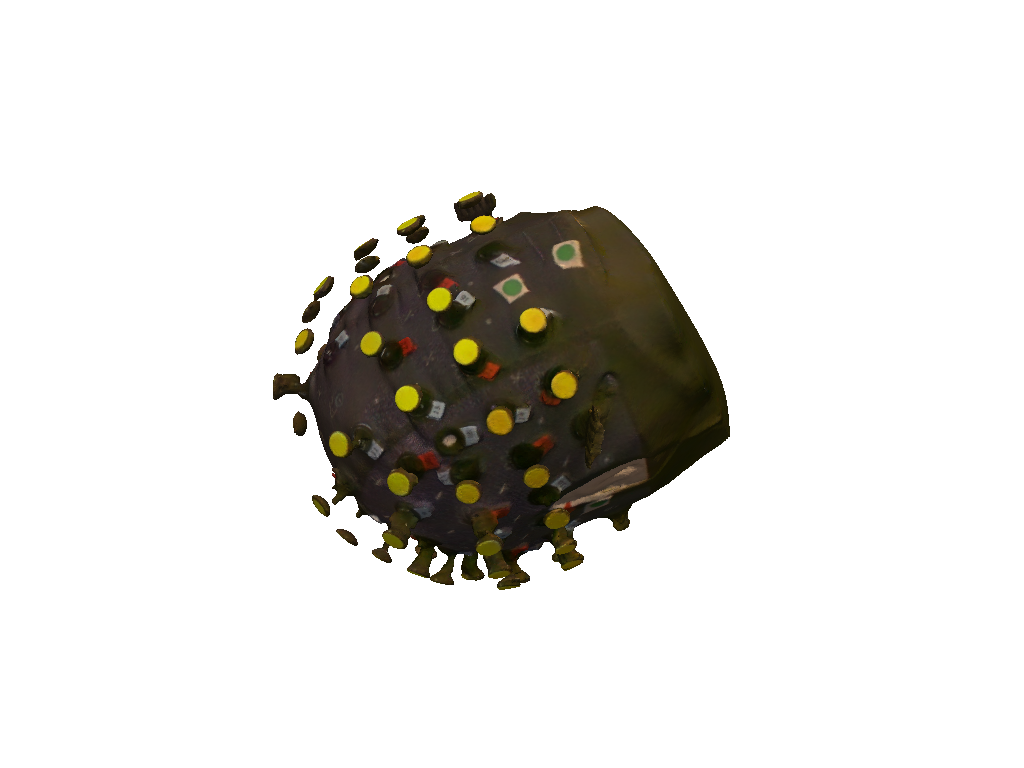

In [7]:
# plot the scan
import pyvista as pv
pv.set_jupyter_backend("static") # use "client" for interactive rendering
plt = pv.Plotter()
cedalion.plots.plot_surface(plt, s, opacity=1.0)
plt.show()

## If you run into trouble you can get help by the community
Visit the Cedalion forum on openfnirs.org/community/cedalion and particularly the [thread for installing cedalion](https://openfnirs.org/community/cedalion/installing-cedalion/#post-2165)